# Climate Data Store | Copernicus 

Site: https://cds.climate.copernicus.eu

<img src="https://cds.climate.copernicus.eu/_next/image?url=%2F_next%2Fstatic%2Fmedia%2Flogo.b0e67523.png&w=128&q=75" style="float: left;"/>


## Step 1

Create an account in the Climate Data Store site:
https://accounts.ecmwf.int/auth/realms/ecmwf/login-actions/registration?client_id=cds&tab_id=8fKgd42QWB0


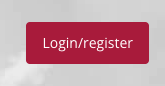

## Step 2
Install your cds api key. 
1. Login and Click here: https://cds.climate.copernicus.eu/how-to-api
2. Copy your url and key like in the image 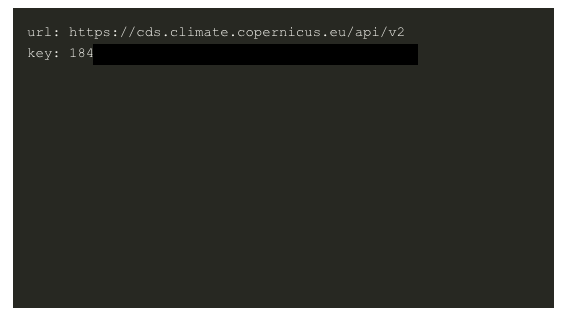
3. In your home directory create an empty file named ".cdsapirc" (on windows usually: C:\Users\username)
4. Open the .cdsapirc file in the text editor and paste your cds api key from step 2.
5. Save and close the .cdsapirc file

## Step 3
Install the CDS API CLIENT by running 
```$ pip install cdsapi```

In [2]:
#! pip install opendap-protocol
#! pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.3-py3-none-any.whl size=21230 sha256=41de09e05e9ba53c7b744aa07202c5c066d3c76faea4c45fabc18991f3fdaa75
  Stored in directory: /Users/cojack/Library/Caches/pip/wheels/70/63/a5/227d224a21526496d9db3289468968e1c2d6fd7c2d3531897d
Successfully built multiurl


## Test your CDS API KEY
Run the following code to retrieve some data from the Climate Data Store

In [2]:
import cdsapi
c = cdsapi.Client()

c.retrieve("reanalysis-era5-pressure-levels",
{
"variable": "temperature",
"pressure_level": "1000",
"product_type": "reanalysis",
"year": "2008",
"month": "01",
"day": "01",
"time": "12:00",
"format": "netcdf"
}, "download.nc")

2025-01-18 01:08:20,372 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2025-01-18 01:08:20,373 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-01-18 01:08:20,373 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2025-01-18 01:08:20,374 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

'download.nc'

In [3]:
import xarray as xr
xr.open_dataset('download.nc')

<xarray.Dataset> Size: 4MB
Dimensions:         (valid_time: 1, pressure_level: 1, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 8B 2008-01-01T12:00:00
  * pressure_level  (pressure_level) float64 8B 1e+03
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          <U4 16B ...
Data variables:
    t               (valid_time, pressure_level, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-18T00:07 GRIB to CDM+CF via cfgrib-0.9.1...

# ESGF GCMs
<img src="https://wcrp-cmip.org/wp-content/themes/cmip/img/logo/logo.svg" style="float: left;" width=200/> <img src="https://wcrp-cmip.org/wp-content/themes/cmip/img/WCRP-logo.svg" style="float: left;" width=150/>

## direct ESGF GCM data access 

ESGF is a global data repository for Earth System data. It is operated by various climate centres around the world. You can check the operational servers at https://aims2.llnl.gov/nodes/ 



Register with CEDA: https://esgf-ui.ceda.ac.uk/cog/search/cmip6-ceda/

In [ ]:
# install the esgf-pyclient

! pip install pydap
! pip install esgf-pyclient
! pip install pyOpenSSL


Run the following code in your terminal:
````
pip install ContrailOnlineCAClient
online-ca-client get_trustroots -s https://slcs.ceda.ac.uk/onlineca/trustroots -b -c ./ca-trustroots
online-ca-client get_cert -s https://slcs.ceda.ac.uk/onlineca/certificate/ -l cjackisch -c ./ca-trustroots/ -o ./credentials.pem
````


In [1]:
# Open a connection to the ESGF search API
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True)

In [2]:
# use the connection to search for data with some parameters
# the example will search for CMIP6 data of simulations of historical data of the surface temperature with daily frequency
# it will print the number of found datasets
ctx = conn.new_context(facets='CMIP6,historical', variable='tas', frequency='day') 
ctx.hit_count

72479

In [3]:
# let us just take the first found dataset
result = ctx.search()[10]
result.dataset_id

'CMIP6.CFMIP.MOHC.HadGEM3-GC31-LL.a4SST.r1i1p1f3.day.tas.gn.v20200403|esgf.ceda.ac.uk'

In [4]:
# it will consist of several netcdf files, which we can access through the opendap protocol
files = result.file_context().search()
for file in files:
    print(file.opendap_url)


-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CFMIP/MOHC/HadGEM3-GC31-LL/a4SST/r1i1p1f3/day/tas/gn/v20200403/tas_day_HadGEM3-GC31-LL_a4SST_r1i1p1f3_gn_19600101-19891230.nc


In [10]:
import xarray as xr
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})
print(ds)

Note:Caching=1


<xarray.Dataset> Size: 1GB
Dimensions:    (time: 10800, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 86kB 1960-01-01 12:00:00 ... 1989-12-30 12:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 173kB dask.array<chunksize=(120, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 1GB dask.array<chunksize=(120, 144, 192), meta=np.ndarray>
Attributes: (12/40)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CFMIP
    branch_method:                   no parent
    creation_date:                   2020-04-03T10:22:54Z
  

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ds["tas"][:500, ::3, ::3][0].plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()